In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <a id='toc1_'></a>[Image segmentation with a U-Net-like architecture](#toc0_)



## <a id='toc1_1_'></a>[Download the data](#toc0_)

In [3]:
IMAGE_PATH = "/content/drive/MyDrive/Openclassrooms/p8/P8_Cityscapes_leftImg8bit_trainvaltest.zip"
LABEL_PATH = "/content/drive/MyDrive/Openclassrooms/p8/P8_Cityscapes_gtFine_trainvaltest.zip"

In [4]:
#!unzip -q {IMAGE_PATH} -d /content/drive/MyDrive/Openclassrooms/p8
#!unzip -q {LABEL_PATH} -d /content/drive/MyDrive/Openclassrooms/p8

## <a id='toc1_2_'></a>[Prepare paths of input images and target segmentation masks](#toc0_)

In [5]:
import os

input_dir = "/content/drive/MyDrive/Openclassrooms/p8/leftImg8bit"
target_dir = "/content/drive/MyDrive/Openclassrooms/p8/gtFine"
img_size = (160, 160)
num_classes = 3
batch_size = 32

In [6]:
directory = ['val', 'test', 'train']

In [15]:
import os
import shutil
import traceback

def images_in_one_folder(base_dir, directories):
    for dir in directories:
        print(f"Directory: {dir}")
        folder_path = os.path.join(base_dir, dir)

        try:
            # Vérifier si le chemin existe
            if not os.path.exists(folder_path):
                print(f"Le chemin {folder_path} n'existe pas.")
                continue

            # Parcourir chaque sous-dossier dans le dossier courant (val, test, train)
            for folder in os.listdir(folder_path):
                folder_full_path = os.path.join(folder_path, folder)

                try:
                    # Vérifier si c'est un dossier
                    if os.path.isdir(folder_full_path):
                        # Parcourir chaque fichier dans le sous-dossier
                        for file in os.listdir(folder_full_path):
                            file_full_path = os.path.join(folder_full_path, file)

                            try:
                                # Déplacer le fichier dans le dossier parent
                                shutil.move(file_full_path, folder_path)
                                print(f"Fichier déplacé: {file_full_path} vers {folder_path}")
                            except Exception as e:
                                print(f"Erreur lors du déplacement du fichier {file_full_path}: {e}")
                                traceback.print_exc()

                        try:
                            # Supprimer le sous-dossier vide
                            os.rmdir(folder_full_path)
                            print(f"Dossier supprimé: {folder_full_path}")
                        except Exception as e:
                            print(f"Erreur lors de la suppression du dossier {folder_full_path}: {e}")
                            traceback.print_exc()
                except Exception as e:
                    print(f"Erreur lors du traitement du dossier {folder_full_path}: {e}")
                    traceback.print_exc()
        except Exception as e:
            print(f"Erreur lors du traitement du répertoire {dir}: {e}")
            traceback.print_exc()

    print("Tous les fichiers ont été déplacés.\n")

# Chemins des répertoires
input_dir = "/content/drive/MyDrive/Openclassrooms/p8/leftImg8bit"
target_dir = "/content/drive/MyDrive/Openclassrooms/p8/gtFine"

# Liste des répertoires à traiter
directories = ['val', 'test', 'train']

# Appel de la fonction pour les deux répertoires
images_in_one_folder(input_dir, directories)
images_in_one_folder(target_dir, directories)


Directory: val
Directory: test
Directory: train
Tous les fichiers ont été déplacés.

Directory: val
Directory: test
Directory: train
Tous les fichiers ont été déplacés.



In [ ]:
import os

def clean_directories(base_dir, directories, tag):
    """
    Parcourt les dossiers spécifiés et supprime les fichiers qui ne contiennent pas le tag donné.

    :param base_dir: Le répertoire de base contenant les sous-dossiers à nettoyer.
    :param directories: Une liste des sous-dossiers à parcourir (par exemple, ['train', 'test', 'val']).
    :param tag: Le tag que les fichiers doivent contenir pour ne pas être supprimés.
    """
    for dir in directories:
        print(f"Directory: {dir}")
        folder_path = os.path.join(base_dir, dir)

        try:
            # Vérifier si le chemin existe
            if not os.path.exists(folder_path):
                print(f"Le chemin {folder_path} n'existe pas.")
                continue

            # Parcourir chaque fichier dans le dossier courant
            for file in os.listdir(folder_path):
                file_full_path = os.path.join(folder_path, file)

                try:
                    # Vérifier si c'est un fichier et s'il ne contient pas le tag
                    if os.path.isfile(file_full_path) and tag not in file:
                        # Supprimer le fichier
                        os.remove(file_full_path)
                        print(f"Fichier supprimé: {file_full_path}")
                except Exception as e:
                    print(f"Erreur lors du traitement du fichier {file_full_path}: {e}")
                    traceback.print_exc()

        except Exception as e:
            print(f"Erreur lors du traitement du répertoire {dir}: {e}")
            traceback.print_exc()

    print("Nettoyage terminé.\n")

# Chemins des répertoires
target_dir = "/content/drive/MyDrive/Openclassrooms/p8/gtFine"

# Liste des répertoires à traiter
directories = ['val', 'test', 'train']

# Tag à rechercher dans les noms de fichiers
tag = 'gtFine_color'

# Appel de la fonction pour nettoyer les répertoires
clean_directories(target_dir, directories, tag)


In [11]:
# What does one input image and corresponding segmentation mask look like?
from IPython.display import Image, display
from keras.utils import load_img
from PIL import ImageOps

input_img_paths = sorted([os.path.join(input_dir, 'train', img) for img in os.listdir(os.path.join(input_dir, 'train'))])
target_img_paths = sorted([os.path.join(target_dir, 'train', img) for img in os.listdir(os.path.join(target_dir, 'train'))])

print(input_img_paths)
print(target_img_paths)



['/content/drive/MyDrive/Openclassrooms/p8/leftImg8bit/train/aachen_000000_000019_leftImg8bit.png', '/content/drive/MyDrive/Openclassrooms/p8/leftImg8bit/train/aachen_000001_000019_leftImg8bit.png', '/content/drive/MyDrive/Openclassrooms/p8/leftImg8bit/train/aachen_000002_000019_leftImg8bit.png', '/content/drive/MyDrive/Openclassrooms/p8/leftImg8bit/train/aachen_000003_000019_leftImg8bit.png', '/content/drive/MyDrive/Openclassrooms/p8/leftImg8bit/train/aachen_000004_000019_leftImg8bit.png', '/content/drive/MyDrive/Openclassrooms/p8/leftImg8bit/train/aachen_000005_000019_leftImg8bit.png', '/content/drive/MyDrive/Openclassrooms/p8/leftImg8bit/train/aachen_000006_000019_leftImg8bit.png', '/content/drive/MyDrive/Openclassrooms/p8/leftImg8bit/train/aachen_000007_000019_leftImg8bit.png', '/content/drive/MyDrive/Openclassrooms/p8/leftImg8bit/train/aachen_000008_000019_leftImg8bit.png', '/content/drive/MyDrive/Openclassrooms/p8/leftImg8bit/train/aachen_000009_000019_leftImg8bit.png', '/content

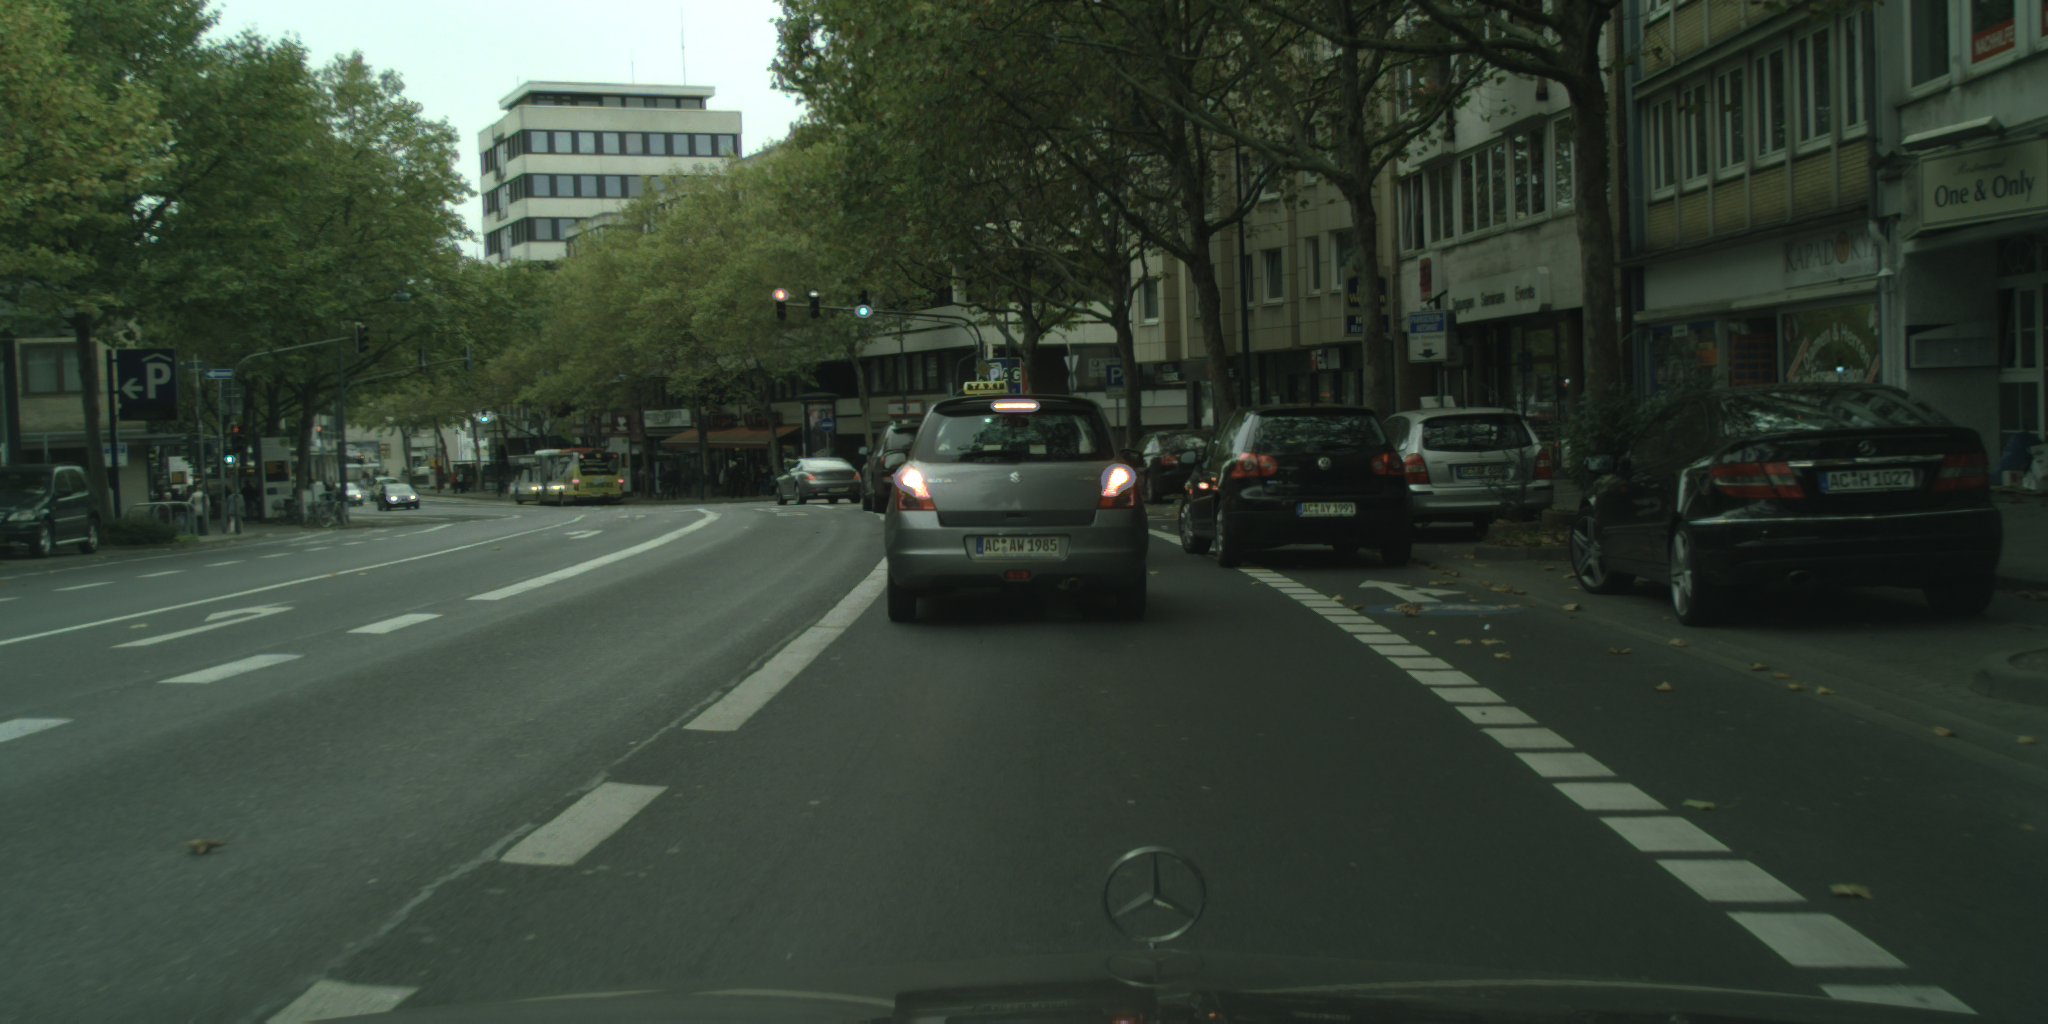

Chemin du fichier 11: /content/drive/MyDrive/Openclassrooms/p8/gtFine/train/aachen_000011_000019_gtFine_color.png


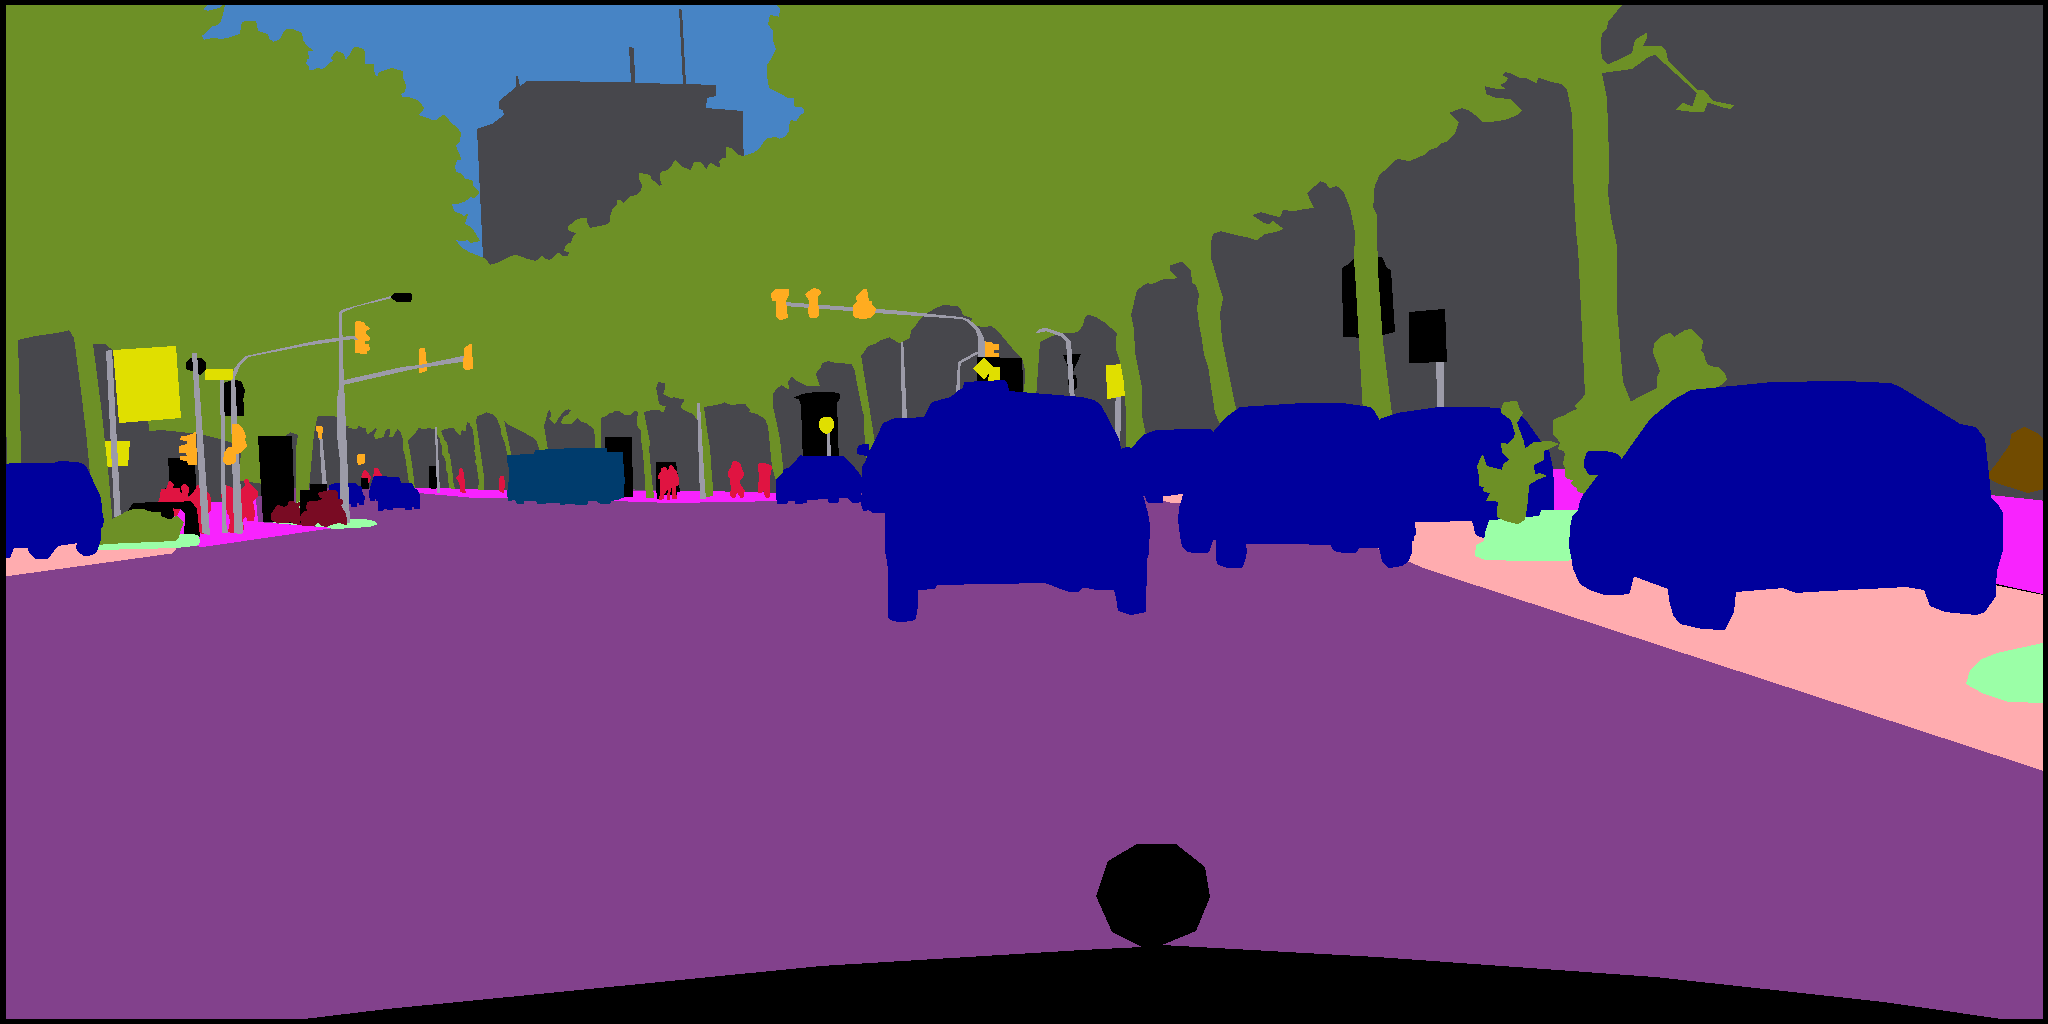

In [18]:
# Display input image #9
display(Image(filename=input_img_paths[11]))

from IPython.display import Image, display
from keras.utils import load_img
from PIL import ImageOps
import os

# Assurez-vous que target_img_paths est bien défini et contient les chemins corrects
input_dir = "/content/drive/MyDrive/Openclassrooms/p8/leftImg8bit"
target_dir = "/content/drive/MyDrive/Openclassrooms/p8/gtFine"

# Liste des fichiers dans le dossier target
target_img_paths = sorted([os.path.join(target_dir, 'train', img) for img in os.listdir(os.path.join(target_dir, 'train'))])

# Vérifiez que le chemin existe et est correct
print(f"Chemin du fichier 11: {target_img_paths[11]}")

# Vérifiez si le fichier existe
if os.path.exists(target_img_paths[11]):
    # Affichez l'image auto-contrast
    img = ImageOps.autocontrast(load_img(target_img_paths[11]))
    display(img)
else:
    print(f"Le fichier {target_img_paths[11]} n'existe pas.")


In [ ]:
# Prepare dataset to load & vectorize batches of data
import keras
import numpy as np
from tensorflow import data as tf_data
from tensorflow import image as tf_image
from tensorflow import io as tf_io

def get_dataset(batch_size, img_size, input_img_paths, target_img_paths, max_dataset_len=None):
    """Returns a TF Dataset."""
    def load_img_masks(input_img_path, target_img_path):
        input_img = tf_io.read_file(input_img_path)
        input_img = tf_io.decode_png(input_img, channels=3)
        input_img = tf_image.resize(input_img, img_size)
        input_img = tf_image.convert_image_dtype(input_img, "float32")

        target_img = tf_io.read_file(target_img_path)
        target_img = tf_io.decode_png(target_img, channels=1)
        target_img = tf_image.resize(target_img, img_size, method="nearest")
        target_img = tf_image.convert_image_dtype(target_img, "uint8")
        # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
        target_img -= 1
        return input_img, target_img

    # For faster debugging, limit the size of data
    if max_dataset_len:
        input_img_paths = input_img_paths[:max_dataset_len]
        target_img_paths = target_img_paths[:max_dataset_len]

    dataset = tf_data.Dataset.from_tensor_slices((input_img_paths, target_img_paths))
    dataset = dataset.map(load_img_masks, num_parallel_calls=tf_data.AUTOTUNE)
    return dataset.batch(batch_size)

# Prepare U-Net Xception-style model
from keras import layers

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(previous_block_activation)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model

# Build model
model = get_model(img_size, num_classes)
model.summary()

# Set aside a validation split
import random

# Split our img paths into a training and a validation set
val_samples = 1000
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]

# Instantiate dataset for each split
train_dataset = get_dataset(batch_size, img_size, train_input_img_paths, train_target_img_paths, max_dataset_len=1000)
valid_dataset = get_dataset(batch_size, img_size, val_input_img_paths, val_target_img_paths)

# Train the model
# Configure the model for training.
model.compile(optimizer=keras.optimizers.Adam(1e-4), loss="sparse_categorical_crossentropy")

callbacks = [keras.callbacks.ModelCheckpoint("oxford_segmentation.keras", save_best_only=True)]

# Train the model, doing validation at the end of each epoch.
epochs = 50
model.fit(train_dataset, epochs=epochs, validation_data=valid_dataset, callbacks=callbacks, verbose=2)

# Visualize predictions
# Generate predictions for all images in the validation set
val_dataset = get_dataset(batch_size, img_size, val_input_img_paths, val_target_img_paths)
val_preds = model.predict(val_dataset)

def display_mask(i):
    """Quick utility to display a model's prediction."""
    mask = np.argmax(val_preds[i], axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    img = ImageOps.autocontrast(keras.utils.array_to_img(mask))
    display(img)

# Display results for validation image #10
i = 10
# Display input image
display(Image(filename=val_input_img_paths[i]))
# Display ground-truth target mask
img = ImageOps.autocontrast(load_img(val_target_img_paths[i]))
display(img)
# Display mask predicted by our model
display_mask(i)  # Note that the model only sees inputs at 150x150.

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 160, 160,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 80, 80,    │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 80, 80,    │        128 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_15       │ (None, 80, 80,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_16       │ (None, 80, 80,    │          0 │ activation_15[0]… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_6  │ (None, 80, 80,    │      2,400 │ activation_16[0]… │
│ (SeparableConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 80, 80,    │        256 │ separable_conv2d… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_17       │ (None, 80, 80,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_7  │ (None, 80, 80,    │      4,736 │ activation_17[0]… │
│ (SeparableConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 80, 80,    │        256 │ separable_conv2d… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 40, 40,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 40, 40,    │      2,112 │ activation_15[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 40, 40,    │          0 │ max_pooling2d_3[… │
│                     │ 64)               │            │ conv2d_10[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_18       │ (None, 40, 40,    │          0 │ add_7[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_8  │ (None, 40, 40,    │      8,896 │ activation_18[0]… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 40,    │        512 │ separable_conv2d… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_19       │ (None, 40, 40,    │          0 │ batch_normalizat

 Total params: 2,058,979 (7.85 MB)

 Trainable params: 2,055,203 (7.84 MB)

 Non-trainable params: 3,776 (14.75 KB)

Epoch 1/50
